In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler


In [15]:
# Step 1: Load the Dataset
df = pd.read_csv("/content/Titanic-Dataset.csv")

In [16]:
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [18]:
# Step 2: Handle Missing Values (Safe version for future pandas)
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
df = df.drop(columns='Cabin')

In [19]:
# Step 3: Encode Categorical Variables
label_encoder = LabelEncoder()
df['Sex'] = label_encoder.fit_transform(df['Sex'])
df['Embarked'] = label_encoder.fit_transform(df['Embarked'])

In [20]:
# Step 4: Normalize Numerical Features
scaler = StandardScaler()
df[['Age', 'Fare']] = scaler.fit_transform(df[['Age', 'Fare']])

In [21]:
# Step 5: Remove Outliers using IQR
Q1 = df[['Age', 'Fare']].quantile(0.25)
Q3 = df[['Age', 'Fare']].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df[['Age', 'Fare']] < (Q1 - 1.5 * IQR)) |
          (df[['Age', 'Fare']] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [22]:
# Step 6: Save Cleaned Dataset
df.to_csv("titanic_cleaned_dataset.csv", index=False)

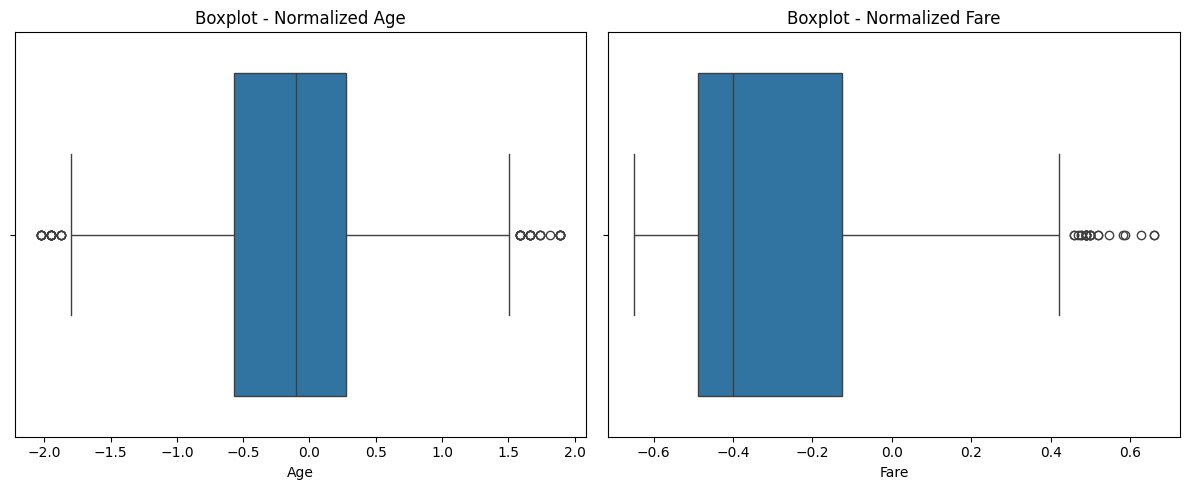

In [23]:
# Step 7: Visualize Outliers (Boxplots)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x=df['Age'])
plt.title("Boxplot - Normalized Age")

plt.subplot(1, 2, 2)
sns.boxplot(x=df['Fare'])
plt.title("Boxplot - Normalized Fare")

plt.tight_layout()
plt.savefig("outliers_boxplot.png")  # Save plot as image
plt.show()